In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

### T_pqr

In [57]:
# Tworzenie grafu pzrez funkcję
def T_pqr(p,q,r):
    G = nx.Graph()
    if p> 1 and q>1 and r >1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

### T_pqr DLA UST. p,q,r o skończonych reprezentacjach

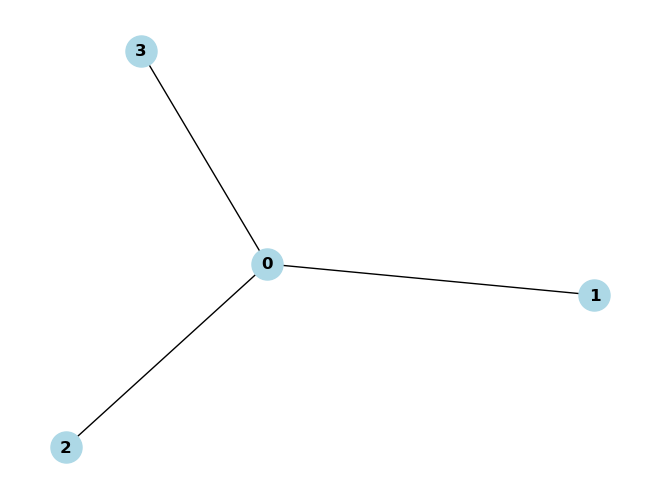

In [58]:
D5 = T_pqr(2,2,2)
labels = {n: D5.nodes[n] for n in D5.nodes}
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

### Przypisywanie wag inicjujących zapis wag

In [59]:
nodes = D5.nodes()
weights = [0,1,2,3,4,5,6]
for node, weight in zip(nodes, weights):
    D5.add_node(node, weight=weight)
for node, weight in D5.nodes(data = 'weight'):
    print(f"node {node} has weight {weight}")

node 0 has weight 0
node 1 has weight 1
node 2 has weight 2
node 3 has weight 3


### WAGI WIERZCHOŁKÓW z listy

In [60]:
def nadawanie_wag(G, wagi_lista):
    wagi = []
    for idx, weight in enumerate(wagi_lista):
        G.add_node(idx, weight=weight) 
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi 

### Odbicie do listy

In [61]:
def odbicie(G, node):
    #jeśli chcesz sprawdzić, czy odbicie działa oraz chcesz mieć wypisane wagi, komenda poniżej to umożliwia:
    #print(nadawanie_wag(G, wagi_lista))
    
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['weight']
    G.nodes[node]['weight'] = nowa_waga1
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] -  G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [62]:
odbicie(D5, 1)

[1, -1, 2, 3]

### ORBITY - raczej nieprzydatna część kodu


In [14]:
#### iteruje tak: 0,1,2,3,4,...ostatni_wierzchołek, ,0,1,2,3,4....
def autom1(G):
    wszystkie_wagi = []
    for node in G.nodes():
        odbicie(G, node)
        node_weights = [G.nodes[node]['weight'] for node in G.nodes()]
        wszystkie_wagi.append(node_weights)
        #for node, w in G.nodes(data='waga'):
         #   print(f"Wierzchołek {node} has weight: {w}")
            #print(f"Aplikuję odbicie do wierzchołka:{node}")
        #plt.figure(figsize=(6, 4))
        #pos = nx.spring_layout(G) 
        #nx.draw(G, pos, labels=  node_weights)
        #plt.show()
        return wszystkie_wagi

### Odbijanie z listy

In [77]:
def odbicia_z_listy(G, lista):
    print(nadawanie_wag(G,wagi_lista))
    for node in lista:
        print(odbicie(G, node))

In [12]:
odbicia_z_listy(D5, [1,3,0,2])

[1, 1, 1, 1]
[2, -1, 1, 1]
[3, -1, 1, -1]
[-3, 2, 4, 2]
[1, 2, -4, 2]


### Eliminacja minusów

In [90]:
wagi_lista = [1,-1,-1,-1]

In [96]:
nadawanie_wag(D5, wagi_lista)

[1, -1, -1, -1]

In [97]:
def pozytywne(G):
    for node, data in G.nodes(data=True):
        if data['weight'] is not None and data['weight'] < 0:
            return False
    return True

In [98]:
def ro_1(G):    
    for node, data in G.nodes(data='weight'):
        G.nodes[node]['weight'] -= 1
    for node, w in G.nodes(data='weight'):
        print(f"{node} ->: {w}")

In [101]:
# nieefektywnie jedzie po ujemnych wierzchołkach
def zmiana_na_dodatnie(G, count = 0):
    nodes_z_odbiciem = []
    wagi = []
    while True: 
        nodes_ujemne = [node for node, data in G.nodes(data='weight') if data is not None and data < 0]
        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1

        if count > 10:
            print("Maximum number of iterations reached. Exiting loop.")
            break
        if not nodes_ujemne:
            break
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")

In [102]:
zmiana2(D5, count = 0)

Wierzchołki w kolejności wywoływania:  [], wagi: [1, 0, 0, 0], count:  0


In [33]:
def ro_2(G):
    for node, data in G.nodes(data= 'weight'):
        G.nodes[node]['weight'] +=1
    for node, w in G.nodes(data='weight'):
        print(f"Wierzchołek {node} has weight: {w}")

### Relacje Knutha

In [81]:
def relations(tableau):
    rows, cols = tableau.shape
    for i in range(rows):
        for j in range(cols - 1):
            if tableau[i, j] > tableau[i, j + 1]:
                tableau[i, j], tableau[i, j + 1] = tableau[i, j + 1], tableau[i, j]

    for i in range(rows - 1):
        for j in range(cols):
            if j == 0 and tableau[i, j] > tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
            elif tableau[i, j] > tableau[i + 1, j] and tableau[i, j - 1] < tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
    
    return tableau

### Kanoniczne bazy

In [82]:
def wiersze_relacje(tableau):
    for row in tableau:
        for i in range(len(row)-1):
            if row[i] > row[i + 1]:
                row[i], row[i + 1] = row[i + 1], row[i]
    return tableau

### Eliminacja plusów

In [96]:
def ujemne(G):
    for node, w in G.nodes(data='weight'):
        if w is not None and w > 0:
            return False
    return True

In [103]:
def zmiana_na_ujemne(G, count = 0):
    nodes_z_odbiciem = []
    wagi = []
    while True: 
        nodes_dodatnie = [node for node, data in G.nodes(data='weight') if data is not None and data > 0]
        for node in nodes_dodatnie:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1

        if count > 10:
            print("Maximum number of iterations reached. Exiting loop.")
            break
        if not nodes_dodatnie:
            break
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")

In [104]:
zmiana_na_ujemne(D5, count = 0)

Wierzchołki w kolejności wywoływania:  [0, 1, 2, 3, 0, 1, 2, 3, 0], wagi na końcu: [-1, 0, 0, 0], count:  9


# omijanie miejsc minusów